# Charity  Data


## using Logistic Regression

In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)


sklearn: 0.21.3


In [2]:
dataset = pd.read_csv('/mnt/1A746F7B746F5891/L U N I X/Machine learning/datasets/udacity-mlcharity-competition/census.csv')
# #drop rows to be string number
# dataset=dataset_not_adjust.drop(dataset.index[[-1,-2]])
# dataset
features = dataset.iloc[:,:-1].values
goal = dataset.iloc[:,-1].values
dataset

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [3]:
#whate is the Correlation and Covarians???
dataset.corr(),dataset.cov()

(                     age  education-num  capital-gain  capital-loss  \
 age             1.000000       0.037623      0.079683      0.059351   
 education-num   0.037623       1.000000      0.126907      0.081711   
 capital-gain    0.079683       0.126907      1.000000     -0.032102   
 capital-loss    0.059351       0.081711     -0.032102      1.000000   
 hours-per-week  0.101992       0.146206      0.083880      0.054195   
 
                 hours-per-week  
 age                   0.101992  
 education-num         0.146206  
 capital-gain          0.083880  
 capital-loss          0.054195  
 hours-per-week        1.000000  ,
                         age  education-num  capital-gain   capital-loss  \
 age              174.712093       1.269536  7.906093e+03     317.683292   
 education-num      1.269536       6.517202  2.431918e+03      84.473549   
 capital-gain    7906.092955    2431.918128  5.634649e+07  -97583.839752   
 capital-loss     317.683292      84.473549 -9.758384e+04

In [4]:
#check if there any data NAN
dataset.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
#check the type of feauters
dataset.dtypes,dataset.describe()# we found out 9 bojects need tor encoding


(age                  int64
 workclass           object
 education_level     object
 education-num      float64
 marital-status      object
 occupation          object
 relationship        object
 race                object
 sex                 object
 capital-gain       float64
 capital-loss       float64
 hours-per-week     float64
 native-country      object
 income              object
 dtype: object,
                 age  education-num  capital-gain  capital-loss  hours-per-week
 count  45222.000000   45222.000000  45222.000000  45222.000000    45222.000000
 mean      38.547941      10.118460   1101.430344     88.595418       40.938017
 std       13.217870       2.552881   7506.430084    404.956092       12.007508
 min       17.000000       1.000000      0.000000      0.000000        1.000000
 25%       28.000000       9.000000      0.000000      0.000000       40.000000
 50%       37.000000      10.000000      0.000000      0.000000       40.000000
 75%       47.000000      13.000

# Handel Categorical DAta
# # Methods  of encoding:

we can use select_dtypes and build new df contain only the objects columns
    obj_df=df.select_dtypes(include=["object"]).copy()

Approach #1 Find and Replace: 
                            new_dic={"featur1":{"cat1':1,"cat2:2},"featur2:{}.....}
                            dataset.replace(new_dic,inplace=True)

Approach #2 Label Encoding   1-change type of data to category.....dataset["feature"]=dataset["feature"].astype("category")
2- creat new column and assign variable to new column using.codes
dataset["feature_new"]=dataset["feature"].cat.codes

3- One Hot Encoding
pd.get_dummies(obj_df,col.umns=["feature1","feature2"],prefix=["f1","f2"])



In [6]:
# pd.get_dummies(dataset,columns=["workclass","education_level"],prefix=["w1","ed_l"]).head()

# Split the Data to dependand and independant X , Y

In [7]:
# first split your dependant and independant variables
training_data = dataset.iloc[:, :-1]
goal_data = dataset.iloc[:, -1]# using .values make it array not dataframe

befor_encoding=pd.DataFrame(training_data)

# Apply encoding to Features

Implement LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
features_objects=["workclass","education_level","marital-status","occupation","relationship","race","sex","native-country"]
features_indeces=[1,2,4,5,6,7,8,12]

#apply labelEncoder
for i,j in zip(features_objects,features_indeces):
    label_encoder = LabelEncoder()
    label_encoder.fit(training_data[i]);
    training_data[i]=label_encoder.transform(training_data[i]);

# #label encode for all dataset to calculate the correlation and describion of dataset and get the more importand features
#     label_encoder.fit(dataset[i]);
#     dataset[i]=label_encoder.transform(dataset[i]);

after_label=pd.DataFrame(training_data)






# Apply OneHotEncoder

In [9]:
#apply onehotencoder
for i,j in zip(features_objects,features_indeces):

    oneHotEncoder = OneHotEncoder(categorical_features=[j]);
    training_data = oneHotEncoder.fit_transform(training_data).toarray();

after_OneHotEncoder=pd.DataFrame(training_data)

print("befor_encoding:\n\n {}\nafter_label :\n\n{}\nafter_OnehotEnder:\n\n {}".format(befor_encoding,after_label,after_OneHotEncoder))

#Encoding Y
goal_train = label_encoder.fit_transform(goal_data)
pd.DataFrame(training_data)


/mnt/1A746F7B746F5891/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/mnt/1A746F7B746F5891/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/mnt/1A746F7B746F5891/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/mnt/1A746F7B746F5891/anaconda3/lib/python3.7/sit

befor_encoding:

        age  workclass  education_level  education-num  marital-status  \
0       39          5                9           13.0               4   
1       50          4                9           13.0               2   
2       38          2               11            9.0               0   
3       53          2                1            7.0               2   
4       28          2                9           13.0               2   
...    ...        ...              ...            ...             ...   
45217   33          2                9           13.0               4   
45218   39          2                9           13.0               0   
45219   38          2                9           13.0               2   
45220   44          2                9           13.0               0   
45221   35          3                9           13.0               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,40.0,38.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,13.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,13.0,4.0,9.0,3.0,4.0,1.0,0.0,0.0,40.0,38.0
45218,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,13.0,0.0,9.0,1.0,4.0,0.0,0.0,0.0,36.0,38.0
45219,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,13.0,2.0,9.0,0.0,4.0,1.0,0.0,0.0,50.0,38.0
45220,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,13.0,0.0,0.0,3.0,1.0,1.0,5455.0,0.0,40.0,38.0


# Plot Features

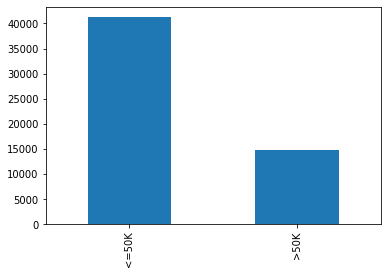

In [10]:
features_objects=["workclass","education_level","marital-status","occupation","relationship","race","sex","native-country","income"]
features_indeces=[1,2,4,5,6,7,8,12,13]

# fig,axs=plt.subplots(1,2,3,4)
for i in features_objects:
    dataset[i].value_counts().plot.bar()
#     plt.show()

In [11]:
# import the needed librarys to encode the target or Y or goal_train
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
goal_data = encoder.fit_transform(goal_data)

# Scaling the Data

In [12]:
# standrize the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)



# Split X & Y to Train and Test 80/20

In [13]:
# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(training_data,goal_data,test_size =0.2,random_state=0)
df=pd.DataFrame(train_set)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,...,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000
mean,0.002309,-0.002309,-0.003147,0.003147,0.003147,-0.003147,-0.005290,0.005290,-0.001098,0.001098,...,-0.000666,0.001197,-0.004169,-0.000920,0.001169,-0.000189,0.003427,-0.000068,0.000441,0.001833
std,0.944956,0.944956,1.001697,1.001697,1.001697,1.001697,1.014192,1.014192,1.001887,1.001887,...,0.999261,1.000483,0.999651,1.000213,0.996383,1.000084,1.019516,0.999196,0.993274,0.996228
min,-46.394273,-0.021554,-1.671940,-0.598108,-0.598108,-1.671940,-5.582435,-0.179133,-3.686155,-0.271285,...,-3.571870,-1.722946,-1.482624,-0.884479,-4.421598,-1.441310,-0.146733,-0.218780,-3.326124,-5.987218
25%,0.021554,-0.021554,-1.671940,-0.598108,-0.598108,-1.671940,0.179133,-0.179133,0.271285,-0.271285,...,-0.438122,-0.390005,-0.985897,-0.884479,0.384110,-1.441310,-0.146733,-0.218780,-0.078120,0.262999
50%,0.021554,-0.021554,0.598108,-0.598108,-0.598108,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,-0.046403,-0.390005,0.007557,-0.258387,0.384110,0.693813,-0.146733,-0.218780,-0.078120,0.262999
75%,0.021554,-0.021554,0.598108,1.671940,1.671940,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,1.128753,0.942936,0.752648,0.993798,0.384110,0.693813,-0.146733,-0.218780,0.338291,0.262999
max,0.021554,46.394273,0.598108,1.671940,1.671940,0.598108,0.179133,5.582435,0.271285,3.686155,...,2.303909,2.275877,1.746102,2.245982,0.384110,0.693813,13.175193,10.538060,4.835527,0.591958


# Determine the best features from dataset using chi2
.....features must be non-negative

In [14]:

#check the negativly of values in database
fd=pd.DataFrame(training_data)# triaing_data must be DataFrame
(fd <0).sum(axis=0)# or 
fd.apply(lambda x: (x<0).sum(),axis=0)

# all has zero so we will not use chi

# #import the necessary libraries first
# from sklearn.feature_selection import SelectKbest
# #Feature extraction where k is the best k feature in datafram
# test=SelectKBest(score_func=chi2,k=4)
# fit=test.fit(train_set,goal_train)

# #summarize scores
# np.set_printoption(precision=3)
# print(fit.scores_)
# features=fit.transform(train_set)
# features

0        21
1     45201
2     11915
3     33307
4     33307
5     11915
6      1406
7     43816
8      3100
9     42122
10     1646
11    43576
12    41426
13    43276
14    24238
15    17169
16    30343
17    27384
18    21084
19    30368
20     6319
21    14695
22    41534
23    43082
24    31445
25     3798
dtype: int64

# implement Recursive Feature Elimination RFE 
which is a type of Wrapper feature seleciton methon



In [15]:
#import library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state = 0)
rfe=RFE(logistic,4)# Where 4 is the top features
rfe.fit(train_set,goal_train);
print('selected Feature: %s'%(rfe.fit(train_set,goal_train).support_));
print("Feature Ranking: %s"%(rfe.fit(train_set,goal_train).ranking_));
logistic.fit(train_set,  goal_train)

selected Feature: [False False False False False False False False False False False False
 False False  True False  True False False False False  True  True False
 False False]
Feature Ranking: [21 14 17 20 19 15  9 13 18 16  7 11  6 12  1 10  1  3 23  5  8  1  1  4
  2 22]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate the LR module
##using Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, logistic.predict(test_set))
pd.DataFrame(cm)

,0,1
0,6414,426
1,1203,1002


# Evaluate Accuracy

In [17]:
logistic.score(test_set, goal_test)

0.8199004975124378

In [18]:
train_set.shape,goal_train.shape
df=pd.DataFrame(goal_train)
df

,0
0,0
1,0
2,0
3,1
4,0
...,...
36172,0
36173,1
36174,1
36175,0


# Using Ridge 

In [19]:
# using Ridge technique to get the coefficient R squar
coeff_matrix = []

for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = alpha, copy_X=True, fit_intercept=True , max_iter=None, \
              normalize=True,random_state=None,solver="auto" ,tol=0.001)
#     ridge.fit(poly_features, salarys)
    ridge.fit(train_set,goal_train)
    coeff_matrix.append(ridge.coef_)

pd.DataFrame(coeff_matrix)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.013207,-0.013719,-0.129373,0.129357,0.129382,-0.129477,0.094760,-0.094691,0.148467,-0.148457,...,0.121203,-0.035853,0.004341,-0.028984,0.012710,0.050228,0.064669,0.045882,0.038713,-0.005357
1,0.000718,-0.000720,0.000892,-0.000892,-0.000892,0.000892,-0.007942,0.007942,-0.001010,0.001010,...,0.121203,-0.035853,0.004341,-0.028984,0.012710,0.050228,0.064669,0.045882,0.038713,-0.005357
2,0.000718,-0.000718,0.000905,-0.000905,-0.000905,0.000905,-0.007953,0.007953,-0.001025,0.001025,...,0.121203,-0.035853,0.004341,-0.028984,0.012710,0.050228,0.064669,0.045882,0.038713,-0.005357
3,0.000718,-0.000718,0.000905,-0.000905,-0.000905,0.000905,-0.007952,0.007952,-0.001025,0.001025,...,0.121189,-0.035852,0.004343,-0.028988,0.012709,0.050221,0.064665,0.045879,0.038712,-0.005356
4,0.000718,-0.000718,0.000897,-0.000897,-0.000897,0.000897,-0.007949,0.007949,-0.001024,0.001024,...,0.121063,-0.035842,0.004354,-0.029022,0.012703,0.050165,0.064623,0.045849,0.038705,-0.005343
5,0.000724,-0.000724,0.000824,-0.000824,-0.000824,0.000824,-0.007913,0.007913,-0.001013,0.001013,...,0.119822,-0.035747,0.004460,-0.029353,0.012641,0.049618,0.064213,0.045553,0.038631,-0.005219
6,0.000890,-0.000890,-0.002876,0.002876,0.002876,-0.002876,-0.005378,0.005378,-0.000491,0.000491,...,0.060370,-0.025771,0.005925,-0.029573,0.008876,0.028617,0.037368,0.026394,0.028895,-0.000189
7,0.000529,-0.000529,-0.003716,0.003716,0.003716,-0.003716,-0.002660,0.002660,-0.000551,0.000551,...,0.021876,-0.011523,0.002875,-0.014467,0.004149,0.012641,0.014165,0.009969,0.013246,0.000775
8,0.000324,-0.000324,-0.002875,0.002875,0.002875,-0.002875,-0.001707,0.001707,-0.000514,0.000514,...,0.012361,-0.006826,0.001704,-0.008717,0.002485,0.007524,0.008041,0.005651,0.007895,0.000572
9,0.000179,-0.000179,-0.001879,0.001879,0.001879,-0.001879,-0.001007,0.001007,-0.000381,0.000381,...,0.006640,-0.003767,0.000938,-0.004856,0.001378,0.004167,0.004324,0.003036,0.004373,0.000353


In [20]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names=None , sort=False):
    if names==None:
        names=["X%s"%x for x in range(len(coefs))]
    st=zip(coefs,names)
    if sort:
        st=sorted(st,key=lambda x : -np.abs(x[0]))
    return "+".join("%s * %s"% (round(coefs,5),name)for coefs ,name in st)
print(pretty_print_coefs(ridge.coef_))

0.00018 * X0+-0.00018 * X1+-0.00188 * X2+0.00188 * X3+0.00188 * X4+-0.00188 * X5+-0.00101 * X6+0.00101 * X7+-0.00038 * X8+0.00038 * X9+-0.0025 * X10+0.0025 * X11+0.00027 * X12+7e-05 * X13+0.00454 * X14+0.00151 * X15+0.00664 * X16+-0.00377 * X17+0.00094 * X18+-0.00486 * X19+0.00138 * X20+0.00417 * X21+0.00432 * X22+0.00304 * X23+0.00437 * X24+0.00035 * X25


## Plot function 

In [21]:
# # define a function that return whatever degree polynomial you want
# def getPolynomial(data,degree=1):
#     if degree == 1 :
#         return data 
#     from sklearn.preprocessing import PolynomialFeatures
#     poly = PolynomialFeatures(degree= degree)
#     poly_features = poly.fit_transform(data)
#     return poly_features
# define a function for plotting
def plot(feature = [], actual = [], predicted = [], alpha = 1):
    plt.plot(feature, actual, '-')
#     plt.legend(handles="actual")
    plt.plot( feature, predicted, '*')
#     plt.legend(handles="predicted")
    plt.title('alpha = {}'.format(alpha))
    plt.show()

In [22]:
# poly_features = getPolynomial(features, 13)
pd.DataFrame(train_set)# replace poly_features as features

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.021554,-0.021554,0.598108,-0.598108,-0.598108,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,-0.046403,-0.390005,1.746102,-0.884479,0.38411,0.693813,-0.146733,-0.218780,0.754701,0.262999
1,0.021554,-0.021554,0.598108,-0.598108,-0.598108,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,-0.438122,-0.390005,0.007557,2.245982,0.38411,-1.441310,-0.146733,-0.218780,-0.078120,0.262999
2,0.021554,-0.021554,0.598108,-0.598108,-0.598108,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,0.345316,0.942936,0.255921,0.993798,0.38411,-1.441310,-0.146733,-0.218780,-0.411249,0.262999
3,0.021554,-0.021554,-1.671940,1.671940,1.671940,-1.671940,0.179133,-0.179133,-3.686155,3.686155,...,1.520471,-0.390005,0.752648,-0.884479,0.38411,0.693813,-0.146733,4.663284,0.338291,0.262999
4,0.021554,-0.021554,0.598108,-0.598108,-0.598108,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,-0.046403,-0.390005,1.746102,-0.884479,0.38411,0.693813,-0.146733,-0.218780,0.754701,0.262999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36172,0.021554,-0.021554,0.598108,-0.598108,-0.598108,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,-0.046403,0.942936,0.752648,-0.258387,0.38411,-1.441310,-0.146733,-0.218780,-0.078120,0.262999
36173,0.021554,-0.021554,-1.671940,1.671940,1.671940,-1.671940,0.179133,-0.179133,0.271285,-0.271285,...,0.345316,-0.390005,-0.737534,-0.884479,0.38411,0.693813,-0.146733,-0.218780,1.587523,0.262999
36174,0.021554,-0.021554,-1.671940,1.671940,1.671940,-1.671940,0.179133,-0.179133,0.271285,-0.271285,...,1.128753,-0.390005,-0.737534,-0.884479,0.38411,0.693813,-0.146733,-0.218780,1.171112,0.262999
36175,0.021554,-0.021554,0.598108,-0.598108,-0.598108,0.598108,0.179133,-0.179133,0.271285,-0.271285,...,-0.438122,-0.390005,-0.737534,-0.884479,0.38411,0.693813,-0.146733,-0.218780,-0.078120,0.262999


# Using KNN and with multiple K's

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_set, goal_train)
accuracy={}
for K in [  11,12,13]:
    classifier = KNeighborsClassifier(n_neighbors=K)
    classifier.fit(train_set, goal_train)
    cm = confusion_matrix(goal_test, classifier.predict(test_set))
    accuracy["k_%d"%K]="%4f"%classifier.score(test_set,goal_test)
#     accuracy.__setitem__(k,classifier.score(test_set,goal_test))
    
    print('K = %4f\n-------------'%K)

    print(pd.DataFrame(cm))

    print("\nmodel accuracy : {:.4f}".format(classifier.score(test_set, goal_test)))

    print('-------------\n\n')
print(accuracy)


K = 11.000000
-------------
      0     1
0  6209   631
1   887  1318

model accuracy : 0.8322
-------------


K = 12.000000
-------------
      0     1
0  6324   516
1   978  1227

model accuracy : 0.8348
-------------


K = 13.000000
-------------
      0     1
0  6228   612
1   890  1315

model accuracy : 0.8339
-------------


{'k_11': '0.832172', 'k_12': '0.834826', 'k_13': '0.833941'}


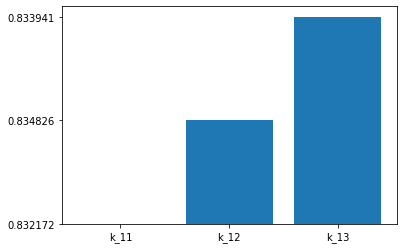

In [24]:
plt.bar(range(len(accuracy)),accuracy.values(),align="center")
plt.xticks(range(len(accuracy)),list(accuracy.keys()))
plt.show()



## From above we get that the KNN model(for k=12 accuracy=0.8347) is mor accurate than logistic regression(accuracy=0.534)


# Naive Bayes classification 

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_set, goal_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.7751243781094528


,0,1
0,5944,896
1,1138,1067


# Visualize the training data--need to modify

In [27]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = train_set, goal_train
X1, X2= np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('naive bayes Classification (Training set)')
plt.xlabel('taining')
plt.ylabel('price')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (23444964,2) (26,) 

In [ ]:
def test_clf(classifier, clf_name, step_size=0.01):
    classifier.fit(train_set, goal_train)
    cm = confusion_matrix(goal_test, classifier.predict(test_set))
    print(classifier.score(test_set, goal_test))
#     X_set, y_set = train_set, goal_train
#     X1, X2= np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = step_size),
#                          np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = step_size))
#     plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape))
#     plt.xlim(X1.min(), X1.max())
#     plt.ylim(X2.min(), X2.max())
#     for i, j in enumerate(np.unique(y_set)):
#         plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
#     plt.title('{} Classification (Training set)'.format(clf_name))
#     plt.xlabel('Age')
#     plt.ylabel('Estimated Salary')
#     plt.legend()
#     plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [ ]:
clf = BernoulliNB()
test_clf(clf, "BernoulliNB")

In [ ]:
clf = MultinomialNB()
clf.fit(train_set, goal_train)
clf.score(test_set, goal_test)

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#train_set, test_set, goal_train, goal_test
# classifiers
l_svm = LinearSVC(random_state=0)
svc = SVC(random_state=0)
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()

# training
l_svm.fit(train_set, goal_train)
svc.fit(train_set, goal_train)
lr.fit(train_set, goal_train)
knn.fit(train_set, goal_train);

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = l_svm.predict(test_set)

print(precision_score(goal_test, y_pred, average='micro'))
print(recall_score(goal_test, y_pred, average='micro'))
print(f1_score(goal_test, y_pred, average='micro'))

# Get Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(goal_test, y_pred))

In [ ]:
for clf, label in zip([l_svm, svc, knn, lr], ['LinearSVC', 'SVC', 'KNeighborsClassifier', 'LogisticRegression']):
    print("{} report:".format(label))
    y_pred = clf.predict(test_set)
    print(classification_report(goal_test, y_pred))
    print("\n---------------------\n")

# Applying KNN on  Cross Validation

In [ ]:
# Applying KNN on  Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = train_set, y = goal_train, cv = 10)
accuracies

# Mean of Accuracy and Performance

In [ ]:
print("mean of acc:", accuracies.mean())
print("Standard diviation of acc:", accuracies.std())
print("model acc : {:.2f} (+/- {:.2f})%".format(accuracies.mean(), accuracies.std()))

# Grid Search for SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state = 0)

In [ ]:

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{"penalty": ["l1", "l2", "elasticnet"], 
               "loss":["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(train_set, goal_train)
print("best accuracy is :" , grid_search.best_score_)
grid_search.best_params_

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=K)
parameters=[{"n_neighbors":[11,12,13],"leaf_size":[1,3,5],
            "algorithm":["auto","ball_tree", "kd_tree", "brute"],
            "n_jobs":[-1]}]

grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        cv=10)
grid_search = grid_search.fit(train_set, goal_train)
print("best accuracy is :" , grid_search.best_score_)
grid_search.best_params_